# Airplane Crashes
1. Justify whether it is safer to take the aircraft nowadays. Support your decision with data.
2. Apply machine learning technique to predict any interesting topic of this.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Dataset ~ https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908

In [644]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."


# EDA & Prelimitary Preprocessing

In [645]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [646]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [647]:
nrows = df.shape[0]
ncols = df.shape[1]
print(nrows, ",", ncols)

5268 , 13


In [648]:
print("Date type:", df.Date.dtype)
print("Time type:", df.Time.dtype)
print("Flight # type:", df['Flight #'].dtype)

Date type: object
Time type: object
Flight # type: object


### Missing Value

In [649]:
na_df = pd.DataFrame(df.isna().sum(), columns=['Missing_Count'])
na_df['Percentage'] = (na_df.Missing_Count/nrows)*100
na_df = na_df.reset_index().rename(columns={'index':'Columns'})
na_df

,Columns,Missing_Count,Percentage
0,Date,0,0.000000
1,Time,2219,42.122248
2,Location,20,0.379651
3,Operator,18,0.341686
4,Flight #,4199,79.707669
5,Route,1706,32.384207
6,Type,27,0.512528
7,Registration,335,6.359150
8,cn/In,1228,23.310554
9,Aboard,22,0.417616


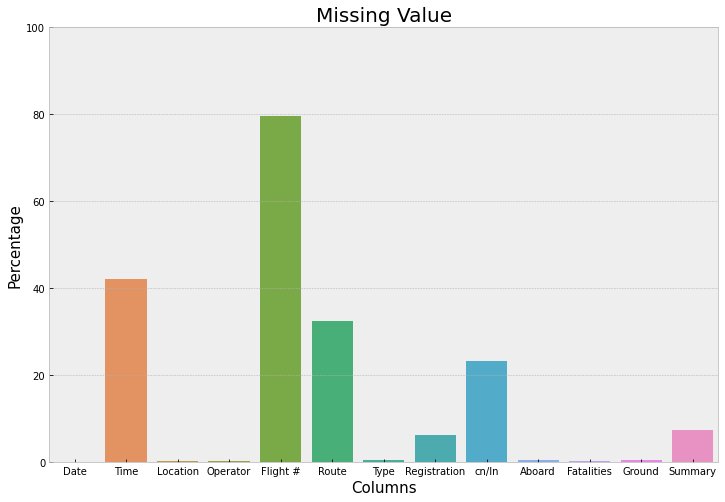

In [650]:
plt.rcParams["figure.figsize"] = (12,8)
bp = sns.barplot(x='Columns', y='Percentage', data=na_df)
bp.set_title("Missing Value", fontsize=20)
bp.set_xlabel("Columns", fontsize=15)
bp.set_ylabel("Percentage", fontsize=15)
bp.set(ylim=(0, 100))
plt.show()

It appears that 80% of Flight # consist of missing value, and it is wise to drop the feature since it represent flight number assigned which doesn't provide any significant impact on the analysis. Approximately 40% of Time consist of missing value as well. Given the sample size of 5268, the missing value must be handled carefully by observing each feature in depth.

In [651]:
df.drop('Flight #', axis=1, inplace=True)

### Date & Time

As we go along with convertion of Time data type, we encountered some structural error such as typo and incorrect naming convention.

In [652]:
df[df.Time.str.startswith('c', na=False)].head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
190,09/03/1929,c: 1:00,"Mt. Taylor, New Mexico",Trans Continental Air Transport,Albuquerque - Los Angeles,Ford 5-AT-B Tri Motor,NC9649,5-AT-002,8.0,8.0,0.0,Crashed in a thunderstorm after being struck by lightning. The plane was named 'The City of San Francisco.'
213,04/18/1930,c:17:00,"Jersey City, New Jersey",Canadian Colonial Airways,"Albany, NY - Jersey City, NJ",Fairchild 71,NaN,634,4.0,4.0,0.0,Crashed into power lines 150 feet above the ground in fog.
228,11/18/1930,c: 2:00,"Techachapi Mountains, California",PacifiAir Transport,"Burbank, CA - Oakland, CA",Boeing 40,NC5340,NaN,3.0,3.0,NaN,"Crashed into a mountainside at an altitude of 4,500 feet during a snowstorm."
279,09/08/1932,c:09:00,"Salt Flats, Texas",American Airways,El Paso - Dallas,Fokker F-10,NC9716,NaN,4.0,3.0,0.0,The mail plane struck a mountain and burned encountering poor weather conditions.
1462,01/23/1957,c16:50,"Ometepe Island, Nicaragua",Lanica,San Carlos - Managua,Douglas DC-3,AN-AEC,12312,16.0,16.0,0.0,"The aircraft hit Concepcion volcano while en route. The aircraft made a left turn towards the volcano, banked sharply in descent, enered a rapid climb and then crashed. Unexplained loss of control."


It seems that the time starting with 'c'of 'c:' appear to be crashed airline based on the corresponding summary. However, the naming conventions here is inconsistence in time column.

In [653]:
df['Time'] = df['Time'].replace(np.nan, '00:00')
df['Time'] = df.Time.str.replace('c: ', '')
df['Time'] = df.Time.str.replace('c:', '')
df['Time'] = df.Time.str.replace('c', '') 
df['Time'] = df.Time.str.replace('12\'20', '12:20')
df['Time'] = df.Time.str.replace('18.40', '18:40') 
df['Time'] = df.Time.str.replace('114:20', '00:00')
df['Time'] = df.Time.str.replace('0943', '09:43')
df['Time'] = df.Time.str.replace('22\'08', '22:08')

C:\Users\nicho\AppData\Local\Temp/ipykernel_15856/2399750872.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df.Time.str.replace('18.40', '18:40')


In [623]:
df['Date'] = df.Date + df.Time
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y%H:%M')
df = df.drop(columns=['Time'])
df.head()

,Date,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
1,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
2,NaT,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."
3,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
4,1913-10-17 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."


### Accident Trends

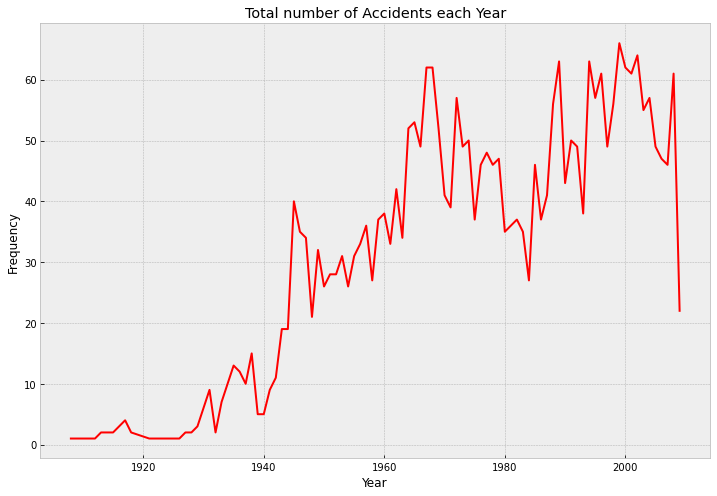

In [624]:
accident = df.groupby(df.Date.dt.year)[['Date']].count()
accident = accident.rename(columns={'Date':'Accidents'}).reset_index()

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
lp = sns.lineplot(data=accident, x="Date", y="Accidents", color='red')
lp.set_xlabel('Year')
lp.set_ylabel('Frequency')
lp.set_title('Total number of Accidents each Year')
plt.show()

The total number of accidents steadily increase across years and a sudden dropped across latest few years. 

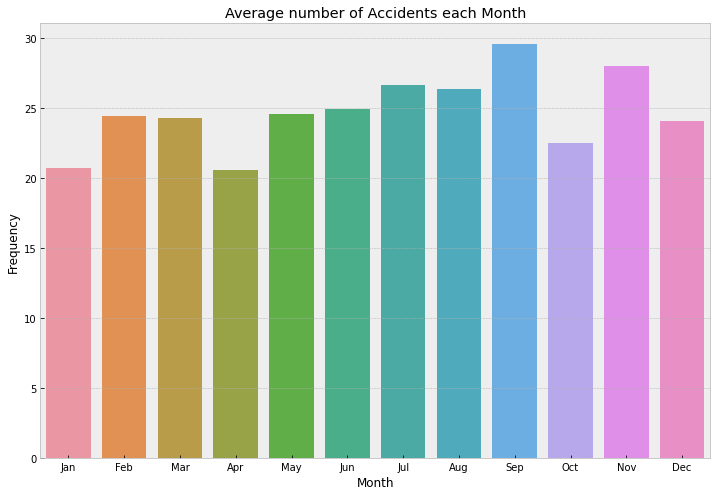

In [625]:
calender_look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

accident = df.groupby(df.Date.dt.month)[['Fatalities']].mean()
accident = accident.rename(columns={'Fatalities':'Accidents'}).reset_index()
accident['Date'] = accident['Date'].apply(lambda x: calender_look_up[x])

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
lp = sns.barplot(data=accident, x="Date", y="Accidents")
lp.set_xlabel('Month')
lp.set_ylabel('Frequency')
lp.set_title('Average number of Accidents each Month')
plt.show()

Average number of accidents does not show a significant trends, showing accidents do not varies across months. 

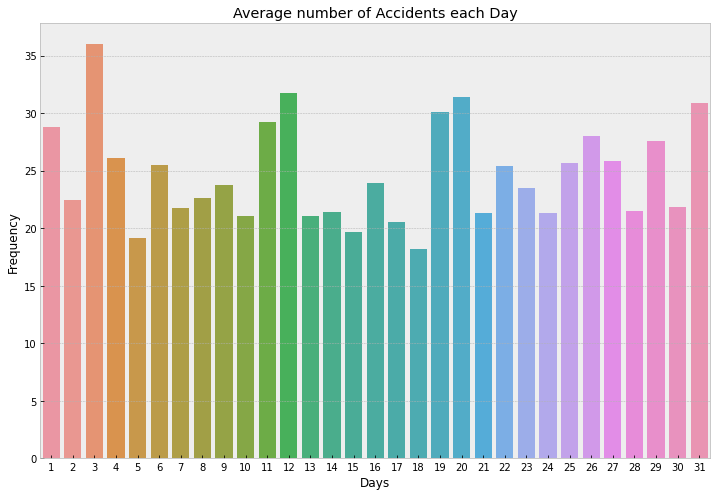

In [626]:
accident = df.groupby(df.Date.dt.day)[['Fatalities']].mean()
accident = accident.rename(columns={'Fatalities':'Accidents'}).reset_index()
accident['Date'] = accident.Date.apply(lambda x: int(x))

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
lp = sns.barplot(data=accident, x="Date", y="Accidents")
lp.set_xlabel('Days')
lp.set_ylabel('Frequency')
lp.set_title('Average number of Accidents each Day')
plt.show()

Similar to the trends for months, the average number of accidents does not show a significant trends across days as well. 

### Ground & Fatalities

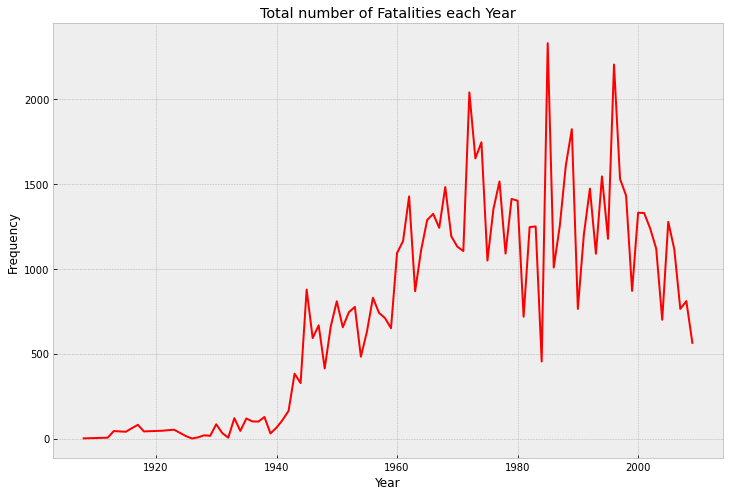

In [627]:
fatality = df.groupby(df.Date.dt.year)[['Fatalities']].sum()
fatality = fatality.reset_index()

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
lp = sns.lineplot(data=fatality, x="Date", y="Fatalities", color='red')
lp.set_xlabel('Year')
lp.set_ylabel('Frequency')
lp.set_title('Total number of Fatalities each Year')
plt.show()

Number of Fatality slowly increases from years 1920 to 1970 and remain a consistence amount of fatalities from 1970 onwards.

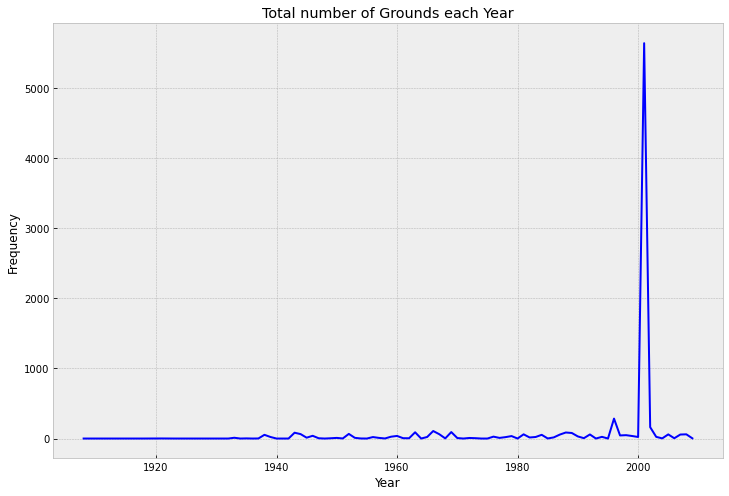

In [628]:
ground = df.groupby(df.Date.dt.year)[['Ground']].sum()
ground = ground.reset_index()

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
lp = sns.lineplot(data=ground, x="Date", y="Ground", color='blue')
lp.set_xlabel('Year')
lp.set_ylabel('Frequency')
lp.set_title('Total number of Grounds each Year')
plt.show()

It is interesting to see a sudden peak of 5000+ of grounds approximately around year 2000. Let's find out why.

In [629]:
df.sort_values(by=['Ground'], ascending=False).head(2)

,Date,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4803,2001-09-11 08:47:00,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,"The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph. After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day."
4804,2001-09-11 09:03:00,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,"The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the south tower of the World Trade Center between the 78th and 84th floors at approximately 550 mph. After 56 minutes, the building collapsed. It was one of four planes that were hijacked the same day."


During year 2011, New York City happen to have 2 cases of 2750 grounds due to aircraft hijacked which operate by different Operator, American Airlines and United Air Lines.

### Operators & Airlines

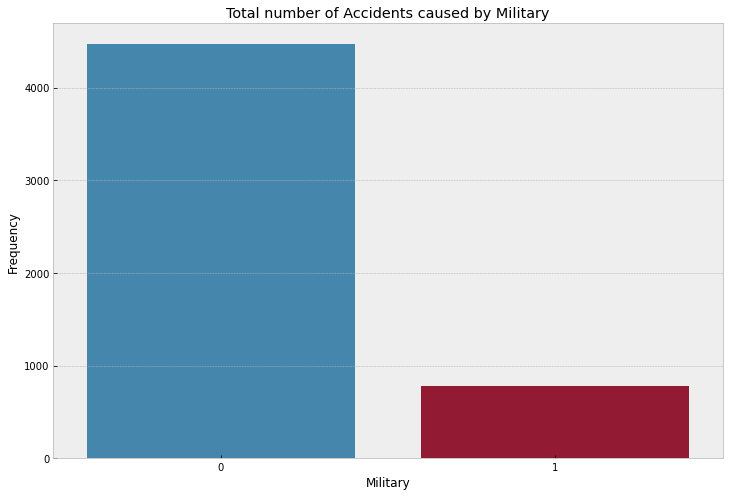

In [630]:
airline = df[['Operator']]
airline = airline[airline.Operator.notna()]
airline['Military'] = airline.Operator.apply(lambda x: 1 if 'Military' in x else 0)

military = airline.groupby(airline.Military)[['Operator']].count()
military = military.rename(columns={'Operator': 'Accidents'}).reset_index()

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
lp = sns.barplot(data=military, x="Military", y="Accidents")
lp.set_xlabel('Military')
lp.set_ylabel('Frequency')
lp.set_title('Total number of Accidents caused by Military')
plt.show()

It's obvious to say that the non-military operatos have higher accident rate than military operators.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

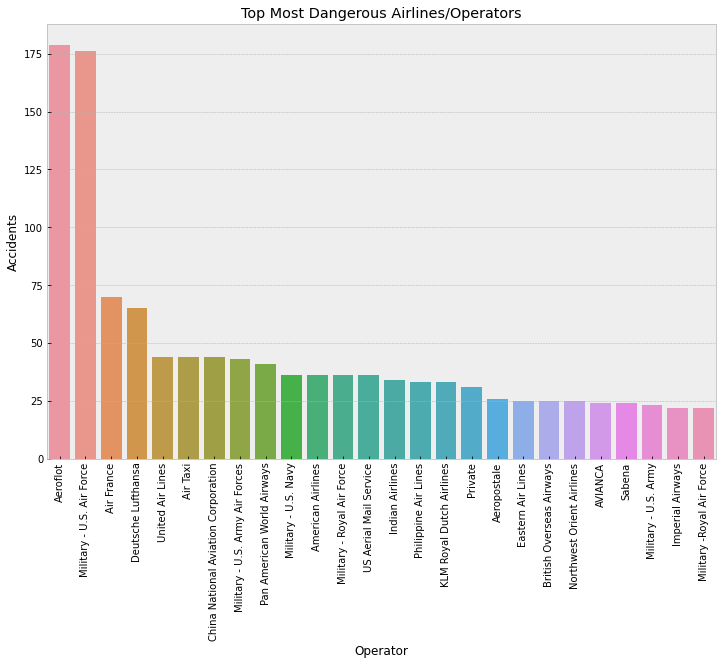

In [631]:
airline = airline.groupby(airline.Operator)[['Military']].count().rename(columns={'Military': 'Accidents'}).reset_index()
airline = airline.sort_values(by="Accidents", ascending=False)

dangerous_al = airline[airline.Accidents > 20]

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
bp = sns.barplot(data=dangerous_al, x="Operator", y='Accidents')
bp.tick_params(axis='x', rotation=90)
bp.set_title("Top Most Dangerous Airlines/Operators")
plt.plot

The barplot shows the Operator that caused more than 20 number of accidents. Aeroflot and Military US Airforce have the highest accident rate which is estimated 175 cases.

In [632]:
d_operator = dangerous_al.Operator.values
df['D_Operator'] = df.Operator.apply(lambda x: 1 if (x in d_operator) else 0)

### Country

In [633]:
country = df[['Location', 'Fatalities', 'Ground']]
country = country[country.Location.notna()]
country['Country'] = country.Location.apply(lambda x: x.split(',')[-1].strip())
df['Country'] = country.Location.apply(lambda x: x.split(',')[-1].strip())

# country = country.groupby(country.Country)[['Location']].count()
country = country.groupby(country.Country).agg(x=('Location', 'count'), y=('Fatalities', 'sum'), z=('Ground', 'sum'))
country = country.rename(columns={'x': 'Accidents', 'y': 'Fatalities', 'z': 'Ground'}).reset_index()
country.sort_values(by="Accidents", ascending=False).head()

# plt.rcParams['figure.figsize'] = (12, 8)
# plt.style.use('bmh')
# lp = sns.barplot(data=military, x="Military", y="Accidents")
# lp.set_xlabel('Military')
# lp.set_ylabel('Frequency')
# lp.set_title('Total number of Accidents caused by Military')
# plt.show()

,Country,Accidents,Fatalities,Ground
58,Brazil,189,3222.0,71.0
10,Alaska,177,1273.0,0.0
382,Russia,175,6662.0,58.0
75,Canada,149,1867.0,15.0
89,Colombia,149,2942.0,41.0


In [634]:
dangerous_country = country[country.Accidents > 50]
d_countries = dangerous_country.Country.values
df['D_Country'] = df.Country.apply(lambda x: 1 if (x in d_countries) else 0)
df.head()

,Date,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,D_Operator,Country,D_Country
0,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later.",1,Virginia,0
1,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight.",1,New Jersey,0
2,NaT,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed.",1,Canada,1
3,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.,0,Over the North Sea,0
4,1913-10-17 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft..",0,Germany,1


### Total Deaths

In [635]:
deaths = df[['Date', 'Aboard', 'Fatalities', 'Ground']]
deaths['Date'] = df.Date.apply(lambda x: x.year)
deaths['Total_Deaths'] = deaths['Fatalities'] + deaths['Ground']
# deaths = deaths.groupby('Date').agg('sum').reset_index()
deaths.sort_values(by="Total_Deaths", ascending=False).head()

C:\Users\nicho\AppData\Local\Temp/ipykernel_15856/3561742341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Date'] = df.Date.apply(lambda x: x.year)
C:\Users\nicho\AppData\Local\Temp/ipykernel_15856/3561742341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths['Total_Deaths'] = deaths['Fatalities'] + deaths['Ground']


,Date,Aboard,Fatalities,Ground,Total_Deaths
4803,2001.0,92.0,92.0,2750.0,2842.0
4804,2001.0,65.0,65.0,2750.0,2815.0
2963,1977.0,644.0,583.0,0.0,583.0
3568,1985.0,524.0,520.0,0.0,520.0
4455,1996.0,349.0,349.0,0.0,349.0


[]

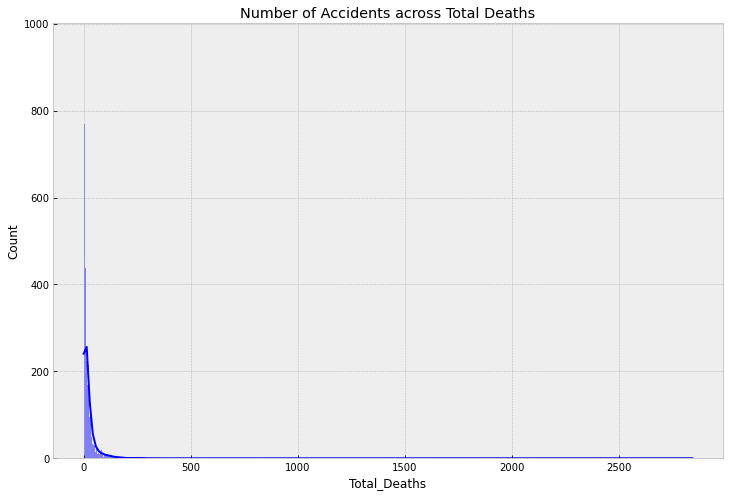

In [636]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('bmh')
hp = sns.histplot(data=deaths, x='Total_Deaths', kde=True)
hp.set_title('Number of Accidents across Total Deaths')
plt.plot()

Number of deaths is less likely to happen in accidents as the histogram show a highest rate of accidents around 0 deaths and almost 0 accidents that caused more than 250 deaths.

# Feature Selection

### Correlation Analysis

<AxesSubplot:>

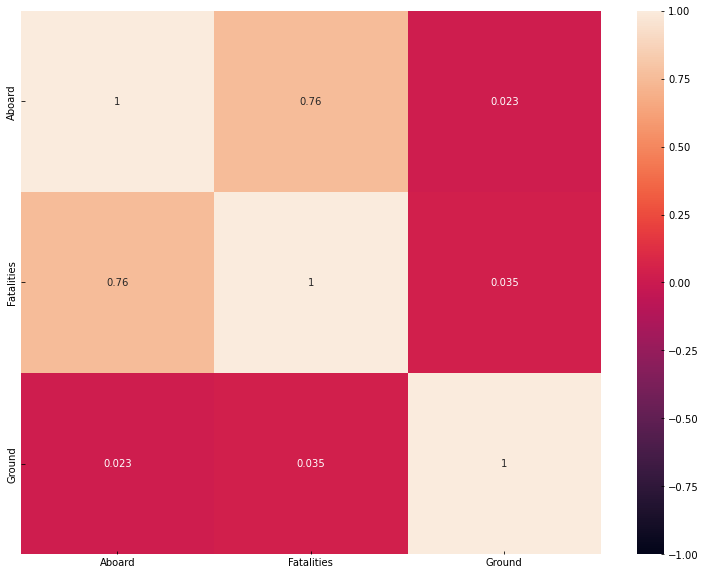

In [669]:
corr = df.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

"Fatalities and Ground" and "Ground and Aboard" have no correlation while Fatalities and Aboard have high positive correlation. If we're performing feature selection, higher correlation features should be dropped.

### Summary

In [666]:
from wordcloud import WordCloud

stop_words = text.ENGLISH_STOP_WORDS.union(['crashed', 'aircraft', 'plane', 'pilot', 'flight', 'runway', 'crew', 'approach'])
wc = WordCloud(stopwords=stop_words, background_color='white', colormap="Dark2", max_font_size=150, random_state=42)

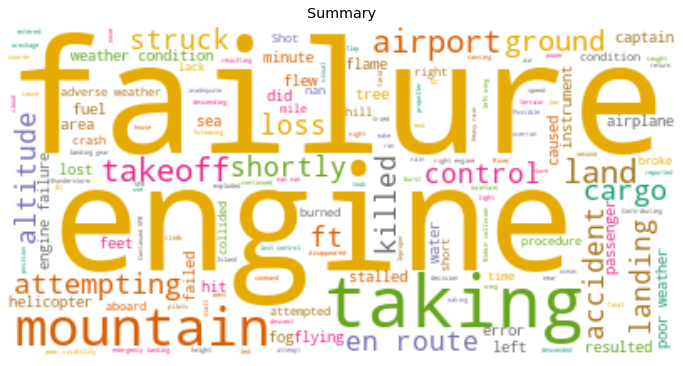

In [667]:
summary = str(df.Summary.tolist())
wc.generate(summary)

plt.rcParams['figure.figsize'] = (12, 8)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Summary")
plt.show()

I've extend several unnecessary words from stopwords that I find it common across the summary and did not provide any impact to the analysis.Based on the summary word cloud above, we can visualize the caused of the crashed is mostly from "failure" and "engine", we can see some words like "mountain", "altitude", "struck" and "poor weather" which could be possible cause of crashes. 

# Justify whether it is safer to take the aircraft nowadays. Support your decision with data.

So back to the question, is it safe to take aircraft nowaday? I would say it depends. Since there's lot of feature that caused accident. The best approach is:
1. Avoid Aeroflot and Military US Airforce as these operators have high accident rate.
2. Beware of New York City, American Airlines and United Air Lines which used to have hijacked cases which caused ground deaths of estimated 2500 peoples.
3. Countries like Brazil and Alaska which have high accident rate and fatalities rate should always be avoided. 

# K-Means Clustering

### Let's move on to the Machine Learning. The approach here is to cluster the text summary using K-means clustering to extract related words that contain meaningful interpretation.

In [670]:
df = df[df.Summary.notna()]

### Document Term Matrix

Each Accident here represent a Document. Count Vectorizater is a simple vectorizer by utilizing word count.

In [603]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(list(df.Summary))
data = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data.index = df.index
data = data.transpose()
data.head()

0     1     2     3     4     5     6     7     8     9     10    \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     1     0     0     1     0     0     0     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         11    12    13    14    15    16    17    18    19    20    22    \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     1     0     0     0     0     1     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         40    43    55    56    58    59    60    61    80    88    92    \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     0     0     0     0     0     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         96    102   104   105   106   107   108   113   114   116   118   \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     0     0     0     0     0     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         119   121   122   123   125   132   137   141   144   146   148   \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     0     0     0     0     0     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         149   150   152   154   156   159   160   161   162   163   164   \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     0     0     0     0     0     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         165   166   167   168   170   174   175   176   179   181   182   \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     0     0     0     0     1     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         183   188   189   190   191   192   193   194   195   196   197   \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     0     0     0     0     0     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0   
000ft       0     0     0     0     0     0     0     0     0     0     0   
000m        0     0     0     0     0     0     0     0     0     0     0   

         198   199   200   201   202   204   205   206   208   210   211   \
00          0     0     0     0     0     0     0     0     0     0     0   
000         0     0     0     0     0     0     0     0     0     0     0   
000feet     0     0     0     0     0     0     0     0     0     0     0 

### Modeling

In [593]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [609]:
random_state = 0 
model = MiniBatchKMeans(n_clusters=7, random_state=random_state)
model.fit(data)

C:\Users\nicho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=7, random_state=0)

In [611]:
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = cvn.get_feature_names()

for i in range(7):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
flightcrews
history
cazenga
kiev
harrington
institute
barbados
kenny
exit
erdenet


Cluster 1:
allowed
deluvio
applied
4b
activate
900
airloads
callouts
285
fork


Cluster 2:
family
lawrence
capsized
capanne
caparao
cape
capital
capped
caps
capsule


Cluster 3:
induced
decision
discipline
hilltop
kilo
contradictory
commencement
clipped
contributed
investigate


Cluster 4:
hull
esenboga
failure
includes
boniface
hypoxia
lawrence
caps
capanne
caparao


Cluster 5:
involve
kathleen
kennedy
blewett
fit
formation
hypobarihypoxia
intended
homebuilt
incredibly


Cluster 6:
240
controls
developed
ample
flux
broke
indexed
industrial
intermediate
journalists
